<a href="https://colab.research.google.com/github/abookvv/Math-Analysis-FirstYear/blob/main/%D0%A2%D0%B8%D0%BF%D0%BE%D0%B2%D0%B8%D0%BA1_1/Tipovik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# импортируем нужные библиотеки
import numpy as np
from matplotlib import pyplot as plt

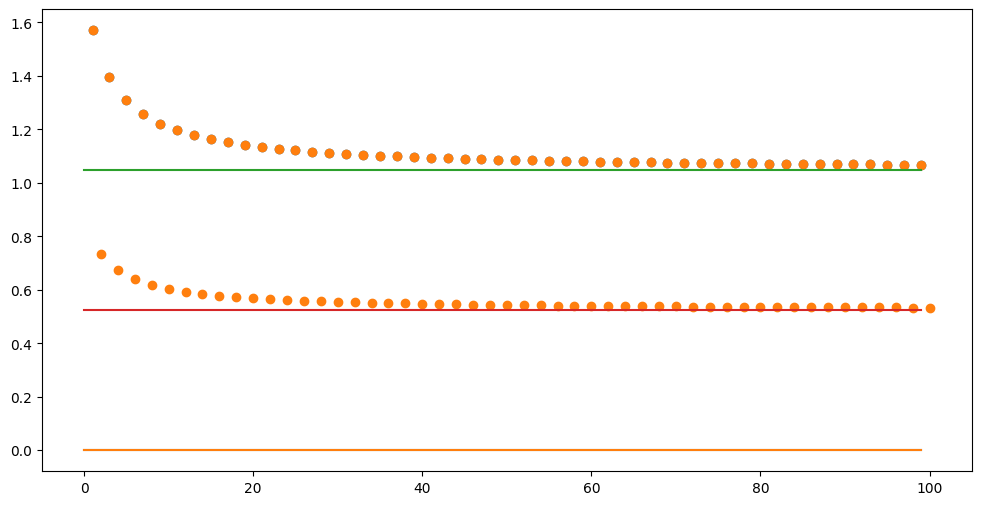

1


In [ ]:
def f(x):
    return ((x + 5) / (x + 3)) * (np.arccos(np.sqrt( (2+(-1)**x)/4 )))

def e_locality(e):
  n0 = 1
  while f(e)<e:
    n0 += 1
  return n0

plt.figure(figsize=(12, 6))

x_sub_s = np.array(list(range(1, 101, 2)))
y_sub_s = f(x_sub_s)
plt.scatter(x_sub_s, y_sub_s)

x = np.array(list(range(1, 101)))
y = f(x)
plt.scatter(x, y)

#sup
plt.plot([0 for _ in range(1, 101)])
#inf
plt.plot([0 for _ in range(1, 101)])
#lim up
plt.plot([np.pi/3 for _ in range(1, 101)])
#lim down
plt.plot([np.pi/6 for _ in range(1, 101)])


plt.show()


print(e_locality(1.0000000005*np.pi/3))

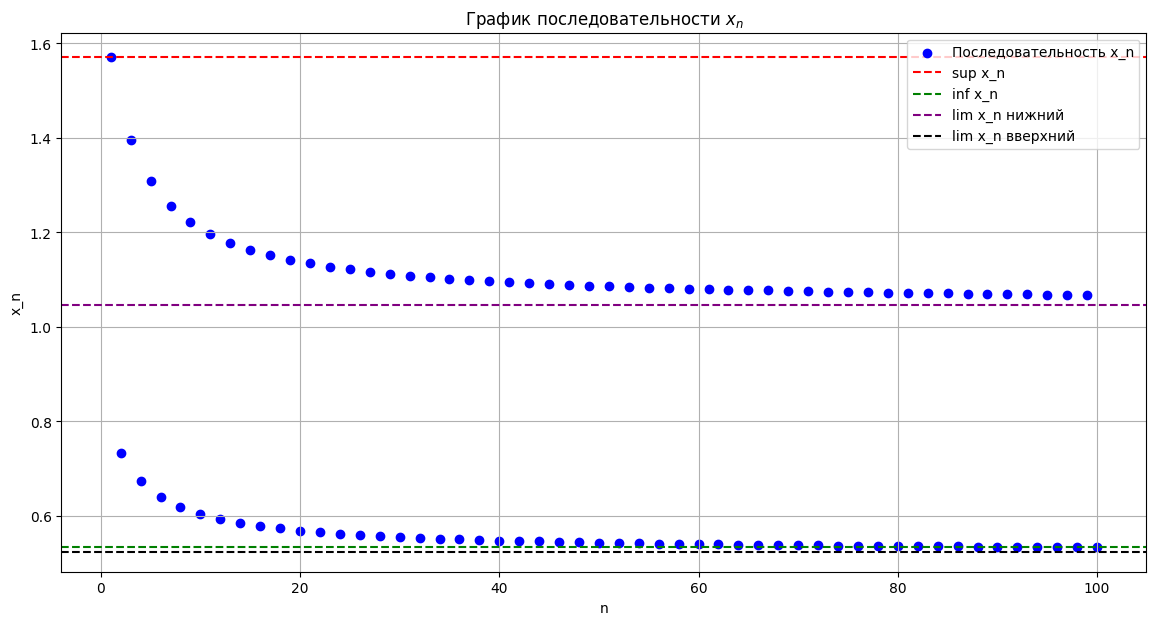

1
8
18
510
914


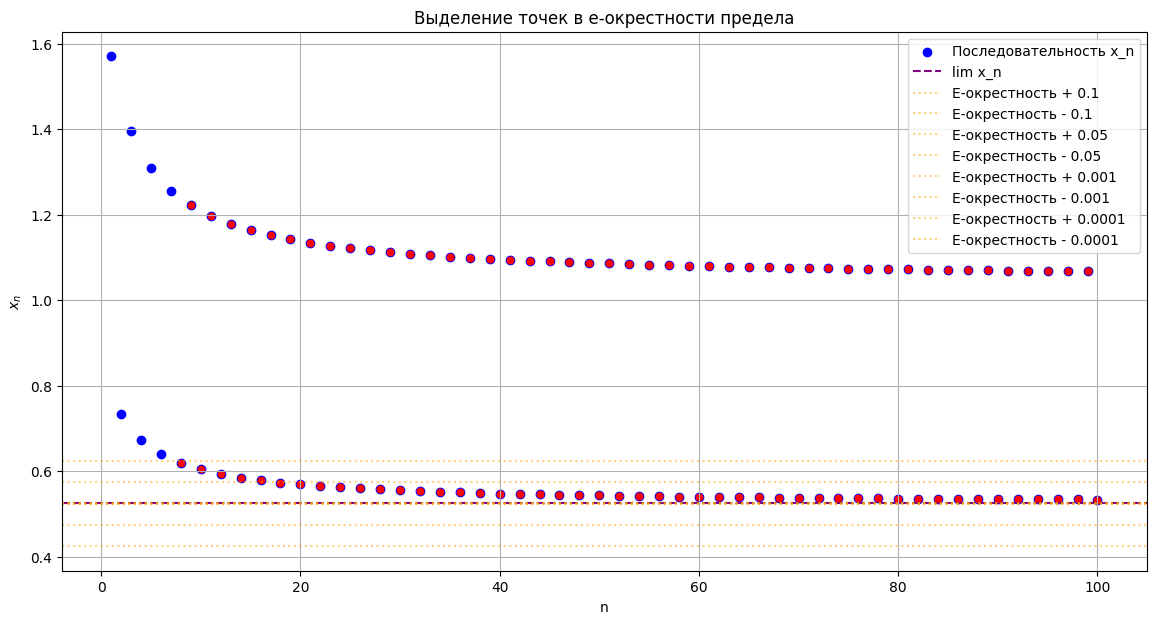

[np.int64(1), np.int64(1), np.int64(1), np.int64(1)]


In [4]:
import numpy as np
from matplotlib import pyplot as plt

def f(n):
    a = (n + 5) / (n + 3)
    b = np.arccos(np.sqrt((2 + (-1)**n) / 4))
    return a * b

N = 100
n_values = np.arange(1, N + 1)
x_values = np.array([f(n) for n in n_values])

sup_x = np.max(x_values)
inf_x = np.min(x_values)
lim_down = np.pi / 3
lim_up = np.pi / 6

plt.figure(figsize=(14, 7))
plt.scatter(n_values, x_values, marker='o', label='Последовательность x_n', color='blue')
plt.axhline(sup_x, color='red', linestyle='--', label='sup x_n')
plt.axhline(inf_x, color='green', linestyle='--', label='inf x_n')
plt.axhline(lim_down, color='purple', linestyle='--', label='lim x_n нижний')
plt.axhline(lim_up, color='black', linestyle='--', label='lim x_n вверхний')

plt.xlabel('n')
plt.ylabel('x_n')
plt.title('График последовательности $x_n$')
plt.legend()
plt.grid(True)
plt.show()

epsilon_values = [0.1, 0.05, 0.001, 0.0001]
limit_value = f(1000)
n0_values = []

more_values = np.arange(1, 13000)
def epsilon_okrestnost(e):
    res = []
    for i in more_values:
        if np.abs(f(i) - limit_value) < e:
            res.append(i)
    return res[0]

print(epsilon_okrestnost(1.5))
print(epsilon_okrestnost(0.1))
print(epsilon_okrestnost(0.05))
print(epsilon_okrestnost(0.001))
print(epsilon_okrestnost(0.0001))

for epsilon in epsilon_values:
    close_indices = np.where(np.abs(x_values - limit_value) < epsilon)[0]
    if len(close_indices) > 0:
        n0 = close_indices[0] + 1
        n0_values.append(n0)
    else:
        n0_values.append(None)

plt.figure(figsize=(14, 7))
plt.scatter(n_values, x_values, marker='o', color='blue', label='Последовательность x_n')
plt.axhline(limit_value, color='purple', linestyle='--', label='lim x_n') #точная граница, которая не достигается

for epsilon, n0 in zip(epsilon_values, n0_values):
    if n0 is not None:
        plt.scatter(n_values[n0-1:], x_values[n0-1:], color='red', s=20)

plt.axhline(limit_value + 0.1, color='orange', linestyle=':', alpha=0.5, label=f'E-окрестность + 0.1')
plt.axhline(limit_value - 0.1, color='orange', linestyle=':', alpha=0.5, label=f'E-окрестность - 0.1')
plt.axhline(limit_value + 0.05, color='orange', linestyle=':', alpha=0.5, label=f'E-окрестность + 0.05')
plt.axhline(limit_value - 0.05, color='orange', linestyle=':', alpha=0.5, label=f'E-окрестность - 0.05')
plt.axhline(limit_value + 0.001, color='orange', linestyle=':', alpha=0.5, label=f'E-окрестность + 0.001')
plt.axhline(limit_value - 0.001, color='orange', linestyle=':', alpha=0.5, label=f'E-окрестность - 0.001')
plt.axhline(limit_value + 0.0001, color='orange', linestyle=':', alpha=0.5, label=f'E-окрестность + 0.0001')
plt.axhline(limit_value - 0.0001, color='orange', linestyle=':', alpha=0.5, label=f'E-окрестность - 0.0001')

plt.xlabel('n')
plt.ylabel('$x_n$')
plt.title('Выделение точек в e-окрестности предела')
plt.grid(True)
plt.legend()
plt.show()

# 8. Поиск элементов x_m > sup_x - epsilon и вывод их номеров
xm_indices = []
for epsilon in epsilon_values:
    threshold = sup_x - epsilon
    indices_above_threshold = np.where(x_values > threshold)[0]
    if len(indices_above_threshold) > 0:
        xm_index = indices_above_threshold[0] + 1
        xm_indices.append(xm_index)

print(xm_indices)